In [1]:
# Import the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Import your Requests Library and the weather_api_key.

import requests
from config import weather_api_key

In [7]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | valea stanciului
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | grindavik
Processing Record 9 of Set 1 | brae
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | leh
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | hamilton
Processing Record 17 of Set 1 | saleaula
City not found. Skipping...
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | abay
Processing Record 22 of

Processing Record 37 of Set 4 | riyadh
Processing Record 38 of Set 4 | beringovskiy
Processing Record 39 of Set 4 | ahipara
Processing Record 40 of Set 4 | flin flon
Processing Record 41 of Set 4 | wuning
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | gladstone
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | beloomut
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | east london
Processing Record 49 of Set 4 | neftegorsk
Processing Record 50 of Set 4 | pihuamo
Processing Record 1 of Set 5 | oistins
Processing Record 2 of Set 5 | hanting
Processing Record 3 of Set 5 | emerald
Processing Record 4 of Set 5 | mar del plata
Processing Record 5 of Set 5 | erzin
Processing Record 6 of Set 5 | yenotayevka
Processing Record 7 of Set 5 | iqaluit
Processing Record 8 of Set 5 | yertsevo
Processing Record 9 of Set 5 | tautira
Processing Record 10 of Set 5 | acari
Proc

Processing Record 26 of Set 8 | tabory
Processing Record 27 of Set 8 | itigi
Processing Record 28 of Set 8 | lake charles
Processing Record 29 of Set 8 | talnakh
Processing Record 30 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 31 of Set 8 | papetoai
Processing Record 32 of Set 8 | constitucion
Processing Record 33 of Set 8 | inta
Processing Record 34 of Set 8 | puerto madero
Processing Record 35 of Set 8 | aksarka
Processing Record 36 of Set 8 | kitimat
Processing Record 37 of Set 8 | cockburn town
Processing Record 38 of Set 8 | rungata
City not found. Skipping...
Processing Record 39 of Set 8 | baunatal
Processing Record 40 of Set 8 | luau
Processing Record 41 of Set 8 | rochegda
Processing Record 42 of Set 8 | xiuyan
Processing Record 43 of Set 8 | kirovskiy
Processing Record 44 of Set 8 | cam ranh
Processing Record 45 of Set 8 | agirish
Processing Record 46 of Set 8 | saint george
Processing Record 47 of Set 8 | kananga
Processing Record 48 of Set 8

Processing Record 14 of Set 12 | rundu
Processing Record 15 of Set 12 | upington
Processing Record 16 of Set 12 | gara
Processing Record 17 of Set 12 | acapulco
Processing Record 18 of Set 12 | prince rupert
Processing Record 19 of Set 12 | steinbach
Processing Record 20 of Set 12 | pitiquito
Processing Record 21 of Set 12 | bonthe
Processing Record 22 of Set 12 | sola
Processing Record 23 of Set 12 | invermere
Processing Record 24 of Set 12 | nkawkaw
Processing Record 25 of Set 12 | sao miguel do araguaia
Processing Record 26 of Set 12 | katobu
Processing Record 27 of Set 12 | kabelvag
Processing Record 28 of Set 12 | sargatskoye
Processing Record 29 of Set 12 | katangli
Processing Record 30 of Set 12 | halifax
Processing Record 31 of Set 12 | utiroa
City not found. Skipping...
Processing Record 32 of Set 12 | bridgeton
Processing Record 33 of Set 12 | hay river
Processing Record 34 of Set 12 | ankazobe
Processing Record 35 of Set 12 | saint-pierre
Processing Record 36 of Set 12 | arl

In [10]:
print(len(city_data))

551


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,42.46,65,75,9.22,AR,2022-05-04 19:37:36
1,Hobart,-42.8794,147.3294,42.66,90,21,6.91,AU,2022-05-04 19:40:18
2,Hermanus,-34.4187,19.2345,62.46,85,99,8.48,ZA,2022-05-04 19:40:33
3,Provideniya,64.3833,-173.3000,29.28,77,58,8.59,RU,2022-05-04 19:40:33
4,Fortuna,40.5982,-124.1573,60.93,85,40,12.66,US,2022-05-04 19:40:34
5,Valea Stanciului,43.9833,23.8667,57.49,84,100,4.56,RO,2022-05-04 19:40:34
6,Port Elizabeth,-33.9180,25.5701,62.10,94,40,2.30,ZA,2022-05-04 19:35:35
7,Grindavik,63.8424,-22.4338,39.15,60,75,5.75,IS,2022-05-04 19:40:35
8,Brae,60.3964,-1.3530,47.01,73,97,17.22,GB,2022-05-04 19:40:35
9,Kapaa,22.0752,-159.3190,77.11,82,75,18.41,US,2022-05-04 19:40:35


In [16]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness,
# and Wind Speed, so they are easy to read.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-05-04 19:37:36,-54.8000,-68.3000,42.46,65,75,9.22
1,Hobart,AU,2022-05-04 19:40:18,-42.8794,147.3294,42.66,90,21,6.91
2,Hermanus,ZA,2022-05-04 19:40:33,-34.4187,19.2345,62.46,85,99,8.48
3,Provideniya,RU,2022-05-04 19:40:33,64.3833,-173.3000,29.28,77,58,8.59
4,Fortuna,US,2022-05-04 19:40:34,40.5982,-124.1573,60.93,85,40,12.66
...,...,...,...,...,...,...,...,...,...
546,Eskisehir,TR,2022-05-04 19:54:51,39.7767,30.5206,47.91,84,98,10.51
547,Requena,ES,2022-05-04 19:54:51,39.4883,-1.1004,49.51,87,100,3.02
548,Saint Marys,US,2022-05-04 19:53:31,30.7305,-81.5465,89.06,63,0,9.22
549,Cap Malheureux,MU,2022-05-04 19:55:52,-19.9842,57.6142,78.48,75,10,5.99


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

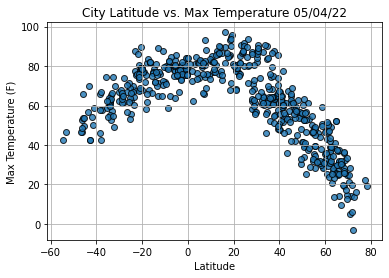

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

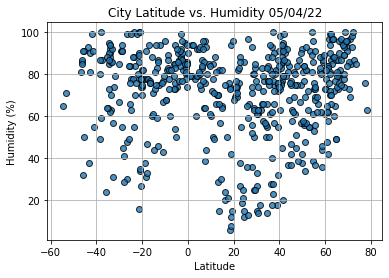

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

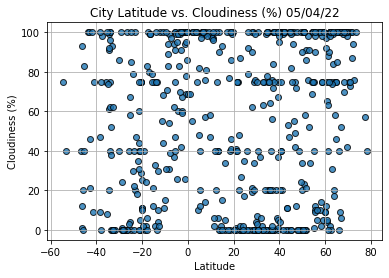

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

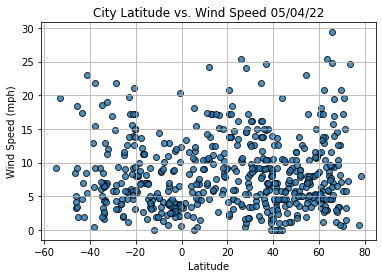

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()